# Investments notebook

This will be the notebook where I do my investment stuff!
Things to do:

- 1 Implement stock indicators
- 2 Implement basic screener
- 3 Implement entry rules and position sizing
- 4 Define functions in functions.py to simplify the notebook's appearance, but first do all of the above!
- 5 Comment on functions.py to make everything clear
- 6 Write readme file, maybe?
- 7 Release first version with basic strategy!

## 0. Make the necessary imports

In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from functions import *
import warnings
warnings.filterwarnings('ignore')

## 1. Filter for relevant stocks

### 1.1 Importing stock lists

If you have already generated the lists of high volume stocks and stocks with strong or weak relative strength in comparison to the S&P500, you can simply run the cell below to import these lists. If not, please follow the steps in sections 1.2 and 1.3 to produce these lists. We recommend re-running Secs. 1.2 and 1.3 at least once per month to keep the lists updated

In [2]:
# Imports lists of high volume stock and stocks organized by relative strength from files

high_volume_stocks_df = pd.read_csv("high_volume_stocks.csv").Ticker
strong_stocks_df = pd.read_csv("strong_stocks.csv").Ticker
weak_stocks_df = pd.read_csv("weak_stocks.csv").Ticker

### 1.2 High volume stocks

Low volume stocks carry a higher risk of investment. Thus, it is recommended to focus our attention is stocks that are traded daily with a high volume. In this section, we consider only the stocks which have been traded consistently with an average volume of 200000 in the past 30 days. Given that this process is time consuming, these stocks are saved in a list of high volume stocks for later use. We recommend to re-run this block at least once per month to guarantee that the list of high volume stocks is up to date.

In [ ]:
# Imports tickers from Nasdaq and NYSE

stock_tickers = import_stock_tickers()

# Checks which of the tickers have a volume larger than the 200000 threshold and exports to a data file

high_volume_stocks = produce_high_volume_list(stock_tickers, volume = 200000):
pd.DataFrame(high_volume_stocks,columns=["Ticker"]).to_csv("high_volume_stocks.csv")

### 1.3 Relative strength analysis

Relative strength measures how well a stock has performed in comparison with the market indicator, i.e., the S&P500. Long positions for stocks with large relative strengths and short positions for stocks with small relative strengths are less risky than the other way around. Thus, it is recommended that, during an uptrend, one focuses on stocks with large relative strengths, and vice-versa for downtrends. This section filters the high volume stocks and separates them into two lists, one for strong and one for weak stocks, in comparison with the S&P500, in the past 30 days. These lists are saved in a file. It is recommended to run this block at least once per month to guarantee that the lists are updated.

In [ ]:
# Produces two lists of strong and weak stocks in comparison with the SPX

strong_stocks, weak_stocks = produce_relative_strength_lists(high_volume_stocks, period = 30)
        
# Exports the lists of strong and weak stocks to data files
        
pd.DataFrame(strong_stocks,columns=["Ticker"]).to_csv("strong_stocks.csv")
pd.DataFrame(weak_stocks,columns=["Ticker"]).to_csv("weak_stocks.csv")

## 2. Strategy type selection

### 2.1 Verification of market trend

Use four moving averages with different periods to verify the short-term and long-term trends of the S&P500. This analysis serves to decide wether to go for long or short strategies, when the market is bullish or bearish, respectively. If the market is found to be currently indecisive or trending sideways, it is recommended to stay out of the market. 

In [3]:
market_uptrend, market_downtrend = verify_market_trend()

### 2.2 Verification of price oscillation

Even if the market is found to be currently uptrending or downtrending, one might prefer to stay out of the market in case the market is currently overbought or oversold, respectively. To verify wether this is the case, we recur to a simple stochastic indicator. Long strategies are recommended if the market is uptrending and not overbought, whereas short strategies are recommended if the market is downtrending and not oversold. Otherwise, it is recommended to stay out of the market until it regresses to the mean.

In [4]:
market_oversold, market_overbought = verify_market_stochastic()

### 2.3 Decision for market strategies

Taking into consideration the trend of the market and the current price status, we conclude which type of strategy to follow. If the market is currently uptrending and not in an overbought state, long positions are recommended. If the market is currently downtrending and not in an oversold state, short positions are recommended. Otherwise, it is recommended to stay inective until the market retraces.

Market is currently good for long positions.


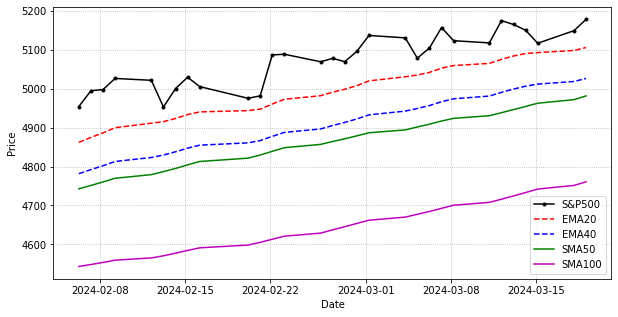

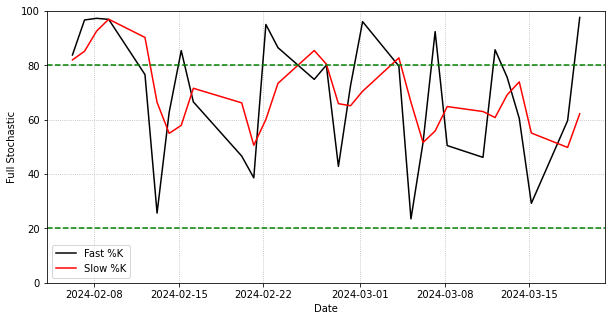

In [5]:
# Analyzed the trend and price status of the market and concludes which strategies are recommended

bias_type, stocks_to_screen = analyze_market(strong_stocks_df.to_list(), weak_stocks_df.to_list())
    
plot_market_conditions()

## 3. Strategy screeners

### 3.1 Basic strategy for bullish markets

Note: we recommend using this strategy when the market is bullish and with strong stocks.

The first strategy in this notebook consists of a basic strategy that takes into account the convergence of four different signals: 

- Signal 1: the price is currently on a downtrend
- Signal 2: the MACD indicator is currently bullish
- Signal 3: the RSI indicator is currently oversold
- Signal 4: a bullish candlestick pattern is detected

If the four signals are detected, a long position is recommended for the stock under consideration.

In [7]:
#if not long_bias:
    
#    print("It is not recommended to follow this strategy in the current market condition.")


for stock in stocks_to_screen:
    
    try:
        ticker = yf.Ticker(stock)
        df_ticker = ticker.history(period="1mo").drop(["Dividends","Stock Splits"], axis = 1)
    
        pattern_signal = detect_bullish_pattern(df_ticker, confirm = True)
    
    except:
        continue
        
    print(stock+": "+str(pattern_signal))
    

AADI: False
AAON: False
AAPD: False
ABEO: False
ABNB: False
ABOS: False
ABSI: False
ACDC: False
ACGL: False
ACHL: False
ACIW: False
ACLX: False
ACMR: False
ACT: False
ACVA: False
ACWI: False
ACWX: False
ADAP: False
ADIL: False
ADMA: False
ADN: False
ADTH: False
ADV: False
AEP: False
AFIB: False
AGIO: False
AHCO: False
AIMD: False
AIRE: False
AISP: False
AKBA: False
AKLI: False
AKRO: False
ALAR: False
ALGN: False
ALGS: False
ALLO: False
ALPN: False
ALRM: False
ALVR: False
AMAT: False
AMD: False
AMRX: False
AMSC: False
ANGI: False
ANNX: False
APA: False
APGE: False
APLT: False
APM: False
APP: False
APPN: False
AQST: False
ARBB: False
AREB: False
AREC: False
ARHS: False
ARM: False
ARQQ: False
ARQT: False
ASLN: False
ASML: False
ASO: False
ASPI: False
ASRT: False
ATAT: False
ATOS: False
ATXI: False
ATXS: False
AVAV: False
AVDX: False
AVT: False
AXON: False
AXTI: False
BAND: False
BCYC: False
BDTX: False
BEAM: False
BEAT: False
BECN: False
BFRI: False
BGC: False
BGLC: False
BGNE: False
BGXX

IMGN: No price data found, symbol may be delisted (period=1mo)


ILAG: False
IMCC: False
IMMR: False
IMRN: False
IMTX: False
IMUX: False
INBS: False
INM: False
INO: False
INTR: False
INZY: False
IONM: False
IOVA: False
IQ: False
IREN: False
ITRI: False
ITRM: False
IUSG: False
IUSV: False
IXUS: False
JAN: False
JANX: False
JBLU: False
JD: False
JKHY: False
JTAI: False
JXJT: False
JZXN: True
KBWB: True
KC: False
KELYA: False
KLAC: False
KNSA: False
KNTE: False
KOD: False
KRON: False
KROS: False
KRYS: False
KSPI: False
KYMR: False
LAB: False
LAMR: False
LASE: False
LAUR: False
LECO: False
LEGN: False
LEXX: False
LFMD: False
LFST: False
LGMK: False
LI: False
LIFE: False
LILM: False
LIN: False
LKQ: False
LLYVK: False
LNTH: False
LNW: False
LOGI: False
LPLA: False
LQDA: False
LRCX: False
LRMR: False
LSCC: False
LSEA: False
LTRN: False
LTRY: False
LUNR: False
LVO: False
LVTX: False
LX: True
LXEH: False
LXRX: False
LYFT: True
LYRA: False
LYT: False
LZ: False
MAMA: False
MARA: False
MAT: False
MCHP: False
MDAI: False
MDGL: False
MEDP: False
MEDS: False
MERC:

DXJ: False
DY: False
DYNF: False
EAF: False
EARN: False
EAT: False
EBS: False
ECL: False
EDU: True
EE: False
EFA: False
EFX: True
EGO: False
EGY: False
EHAB: False
EHC: False
EIX: False
ELF: False
EME: False
EMLP: False
EMN: False
EMR: False
ENFN: False
ENLC: False
ENV: False
ENVA: False
EOG: True
EPAC: False
EPD: False
EQH: False
EQR: False
ERF: False
ERJ: True
ERO: False
ERX: True
ES: False
ESAB: False
ESI: False
ET: False
ETN: False
ETRN: False
ETWO: False
ETY: False
EVH: False
EVR: False
EVTL: False
EW: False
EWC: False
EWD: False
EWG: False
EWI: False
EWJ: False
EWP: False
EWQ: False
EWT: False
EWY: False
EXK: False
EXP: False
FAS: False
FCG: True
FCN: False
FCPT: False
FCX: False
FDL: True
FDX: False
FE: False
FELC: False
FENY: True
FERG: False
FEZ: False
FF: False
FHN: False
FI: False
FIHL: False
FIS: False
FIX: False
FLJP: False
FLS: False
FLT: False
FM: False
FMC: False
FN: False
FNB: False
FND: False
FNDF: False
FNDX: False
FNGU: False
FNV: False
FREY: False
FRGE: False
FRO: 

In [11]:
ticker = yf.Ticker("BLBD")
df_ticker = ticker.history(period="1mo").drop(["Dividends","Stock Splits"], axis = 1)

body_and_range(df_ticker)

df_ticker.tail(4)

,Open,High,Low,Close,Volume,Body,Range
Date,,,,,,,
2024-03-14 00:00:00-04:00,33.150002,33.279999,31.719999,32.040001,358400,1.110001,1.559999
2024-03-15 00:00:00-04:00,31.900000,32.424999,31.421000,31.799999,646300,0.100000,1.004000
2024-03-18 00:00:00-04:00,32.060001,32.779999,31.860001,32.580002,228800,0.520000,0.919998
2024-03-19 00:00:00-04:00,32.509998,34.250000,31.995001,34.240002,542300,1.730003,2.254999


In [2]:

pattern_bullish_pinbar(df_spx,confirmation=False)

False

### 3.2 Basic strategy for bearish markets

Note: we recommend using this strategy when the market is bearish and with weak stocks.

The first strategy in this notebook consists of a basic strategy that takes into account the convergence of four different signals: 

- Signal 1: the price is currently on a uptrend
- Signal 2: the MACD indicator is currently bearish
- Signal 3: the RSI indicator is currently overbought
- Signal 4: a bearish candlestick pattern is detected

If the four signals are detected, a short position is recommended for the stock under consideration.

In [ ]:
if not short_bias:
    
    print("It is not recommended to follow this strategy in the current market condition.")
    
for stock in stocks_to_screen:
    
    try:
        ticker = yf.Ticker(stock)
        df_ticker = ticker.history(period="1mo").drop(["Dividends","Stock Splits"], axis = 1)
    
        pattern_signal = detect_bearish_pattern(df_ticker, confirm = True)
    
    except:
        continue
        
    print(stock+": "+str(pattern_signal))

# WHATEVER IS AFTER THIS IS NOT IMPLEMENTED!

## 4. Order placement

### 4.1 Entry rules

### 4.2 Position sizing

## 5. Backtesting